# Visualisation avec Seaborn


## Charger les données

Utilisation de la bibliothèque Pandas

In [1]:
import pandas as pd
data = pd.read_csv("../data/SOSP_Export_base de données diffusable.csv")
data.head()

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
0,1,nous sommes entre 6 et 10 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1995,Windows,rarement,parfois,souvent,...,oui,oui,oui,oui,oui,oui,je ne sais pas,un homme,Sciences humaines,61 à 65 ans
1,2,nous sommes plus de 50 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2005,Windows,rarement,parfois,parfois,...,oui,oui,oui,oui,oui,NaN,NaN,un homme,Médecine,46 à 50 ans
2,3,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Windows,parfois,rarement,souvent,...,oui,oui,oui,oui,oui,"oui, tout est dans la chronologie",non,un homme,Médecine,36 à 40 ans
3,4,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1989,Windows;autres OS (Android...),souvent,rarement,souvent,...,oui,oui,non,non,non,Oui,Aucune idée,une femme,Médecine,56 à 60 ans
4,5,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),en CDD,NaN,2015,MacOS,souvent,rarement,parfois,...,oui,oui,oui,oui,oui,Oui,Oui,une femme,Médecine,31 à 35 ans


## 4. Faire un graphique


Out of the box

In [2]:
data["disciplines_9niv"].value_counts()

disciplines_9niv
Sciences humaines                                 274
Sciences sociales                                 161
Mathématiques, Informatiques                      138
Sciences du vivant                                138
Physique, Sciences de la terre et de l'Univers    103
Science de l'ingénieur                             91
Chimie, Matériaux                                  59
Lettres et Arts                                    58
Médecine                                           54
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

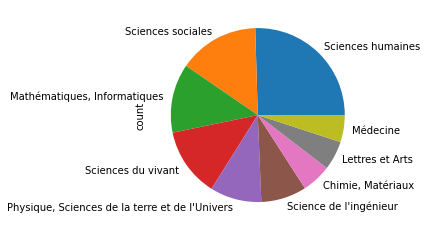

In [3]:
data["disciplines_9niv"].value_counts().plot(kind="pie")

<AxesSubplot:xlabel='disciplines_9niv'>

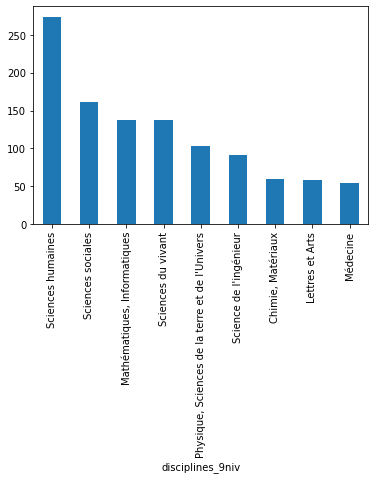

In [4]:
data["disciplines_9niv"].value_counts().plot(kind="bar")

### 4.1. Alternatives avec seaborn

In [2]:
import seaborn as sns

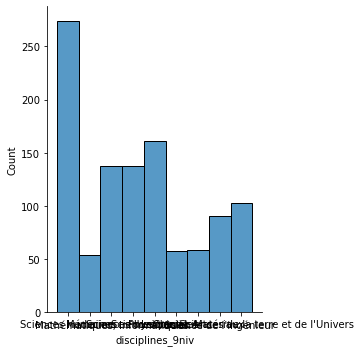

In [3]:
sns.displot(data=data, x="disciplines_9niv")

Les étiquettes sur l'axe des x se chevauchent et sont illisibles.
Nous pouvons cependant appliquer une rotation à ces étiquettes, par exemple à 45°.

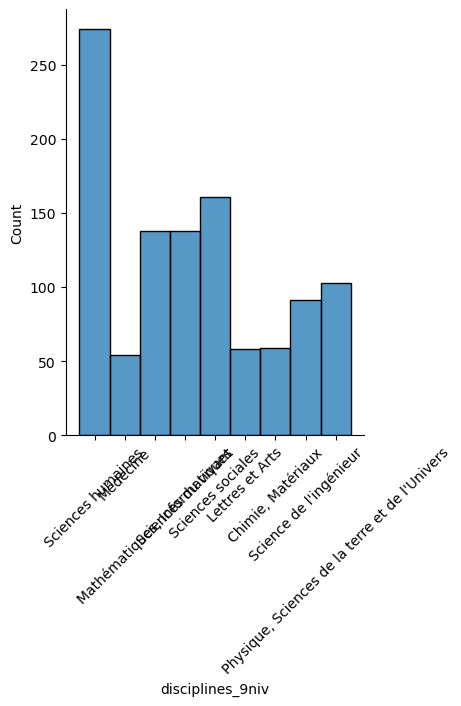

In [44]:
sns.displot(data=data, x="disciplines_9niv").set_xticklabels(rotation=45)

Les étiquettes sont positionnées de façon à ce que le texte soit aligné verticalement avec le centre de la barre.
Ce positionnement a pour effet que les étiquettes les plus longues viennent chevaucher les plus courtes.

Deux façons de régler ce problème: appliquer une rotation à 90°, ou aligner les étiquettes de façon à ce que leur bord droit soit aligné avec le centre de la barre.

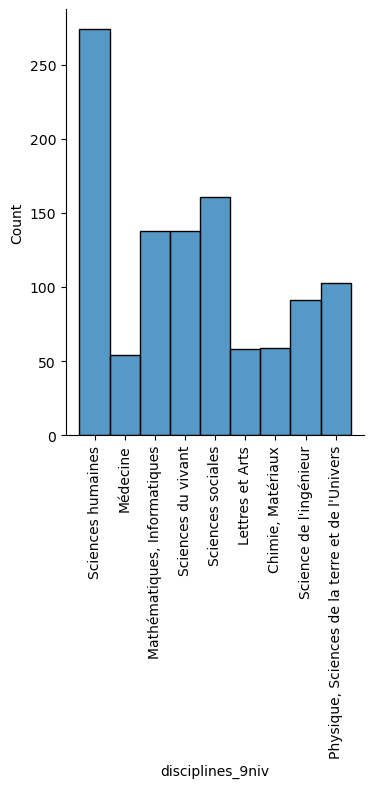

In [40]:
sns.displot(data=data, x="disciplines_9niv").set_xticklabels(rotation=90)

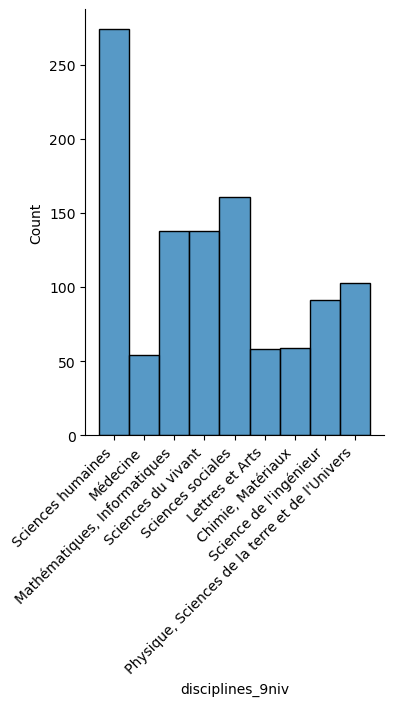

In [43]:
sns.displot(data=data, x="disciplines_9niv").set_xticklabels(rotation=45, horizontalalignment="right")

Croiser disciplines_9niv et sexe:

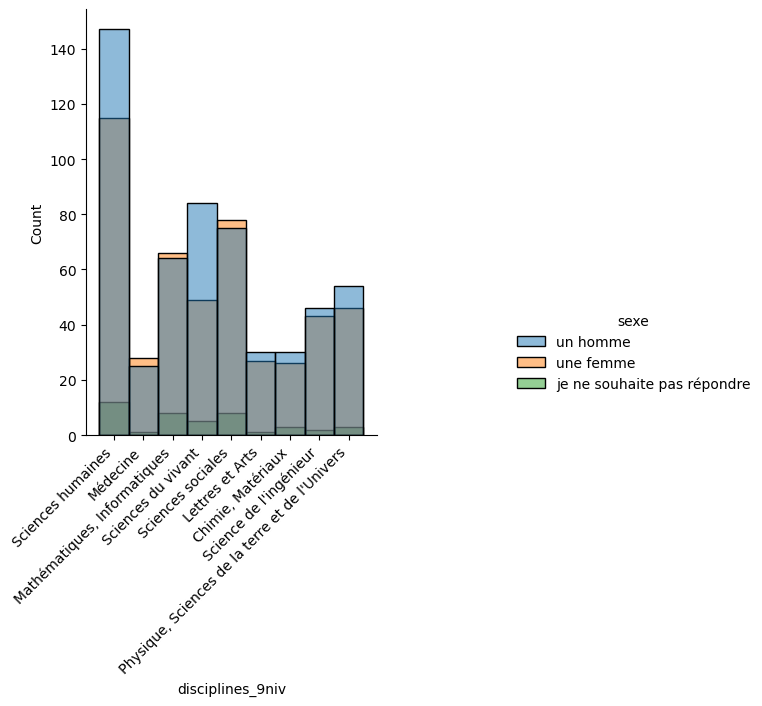

In [45]:
sns.displot(data=data, x="disciplines_9niv", hue="sexe").set_xticklabels(rotation=45, horizontalalignment="right")

Les sous-barres correspondant à "sexe" sont affichées les unes sur les autres, ce qui peut se révéler trompeur pour le lecteur, ou difficile à lire (et les couleurs combinées sont moches).

Il peut être plus lisible de les empiler, ou de les juxtaposer.

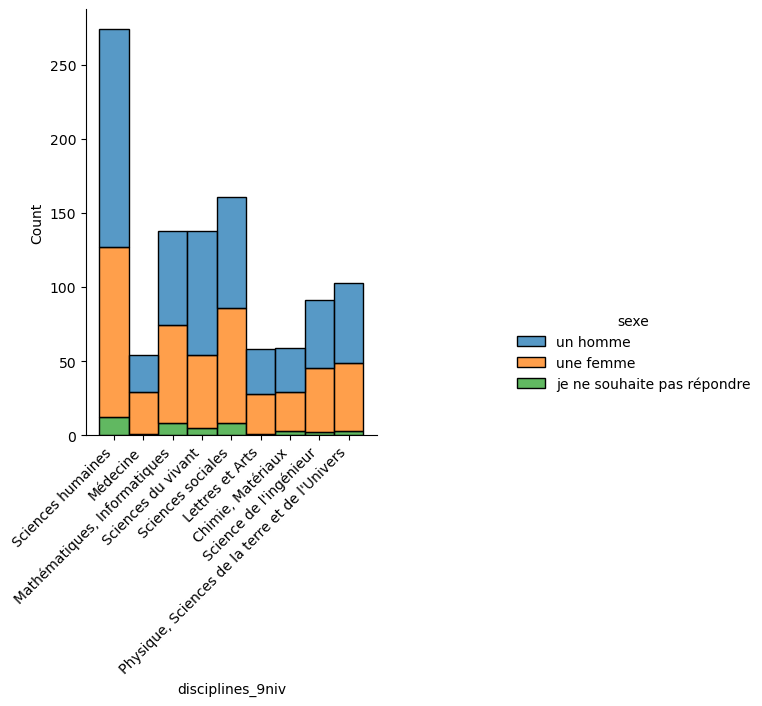

In [47]:
sns.displot(data=data, x="disciplines_9niv", hue="sexe", multiple="stack").set_xticklabels(rotation=45, horizontalalignment="right")

La version "empilée" permet de retrouver les ordres de grandeur absolus et relatifs entre disciplines.

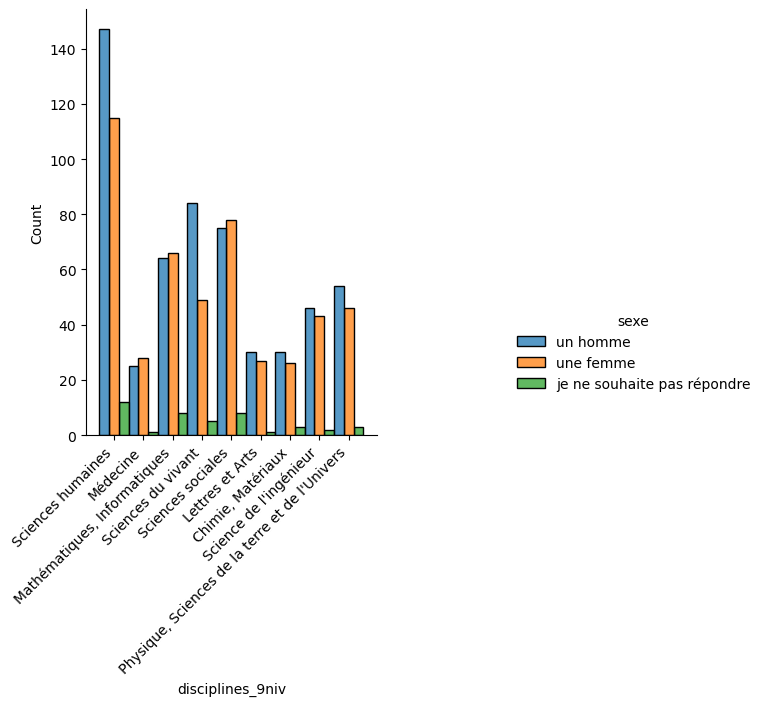

In [46]:
sns.displot(data=data, x="disciplines_9niv", hue="sexe", multiple="dodge").set_xticklabels(rotation=45, horizontalalignment="right")

La version "juxtaposée" met en évidence les écarts absolus entre sexe, parmi les répondents, au sein de chaque discipline.

Les mêmes informations peuvent être affichées sous forme d'un graphe de distribution par sexe déclaré.

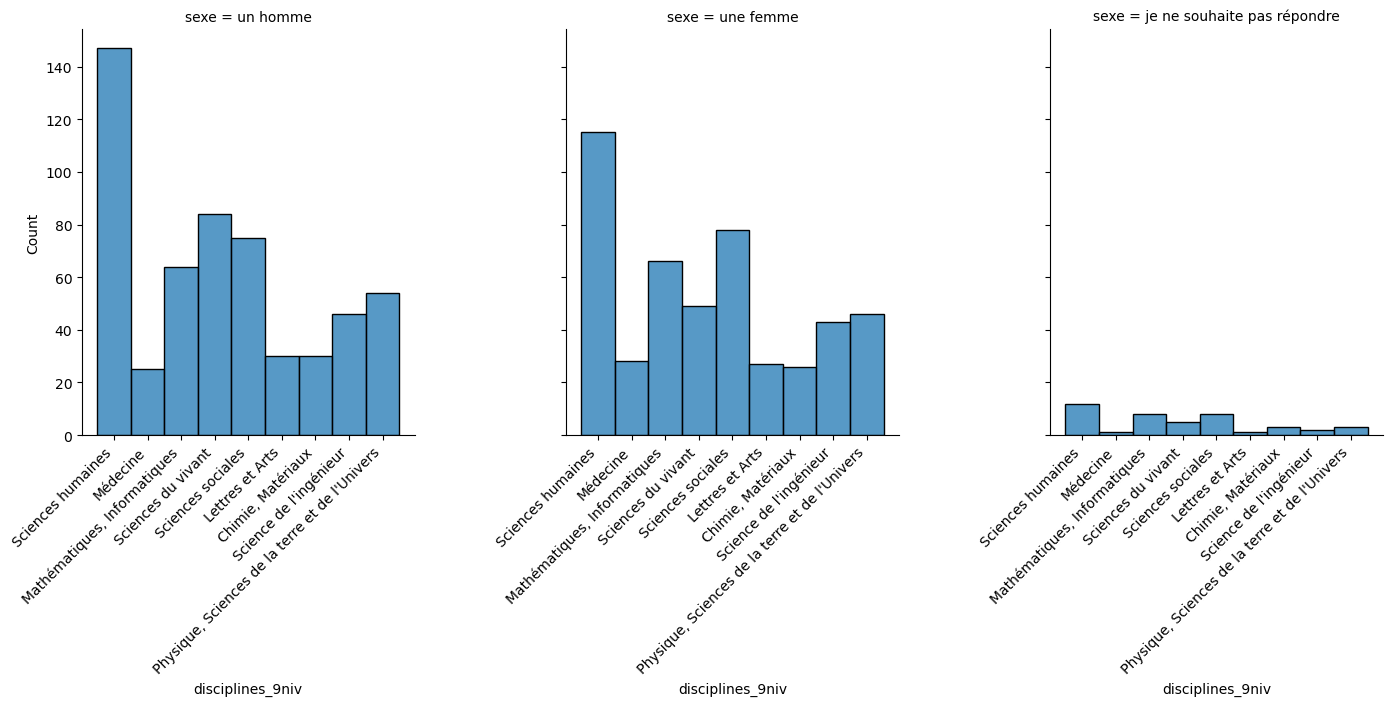

In [49]:
sns.displot(data=data, x="disciplines_9niv", col="sexe").set_xticklabels(rotation=45, horizontalalignment="right")

On peut se ramener à des ratios, en normalisant les valeurs avec le paramètre "stat".

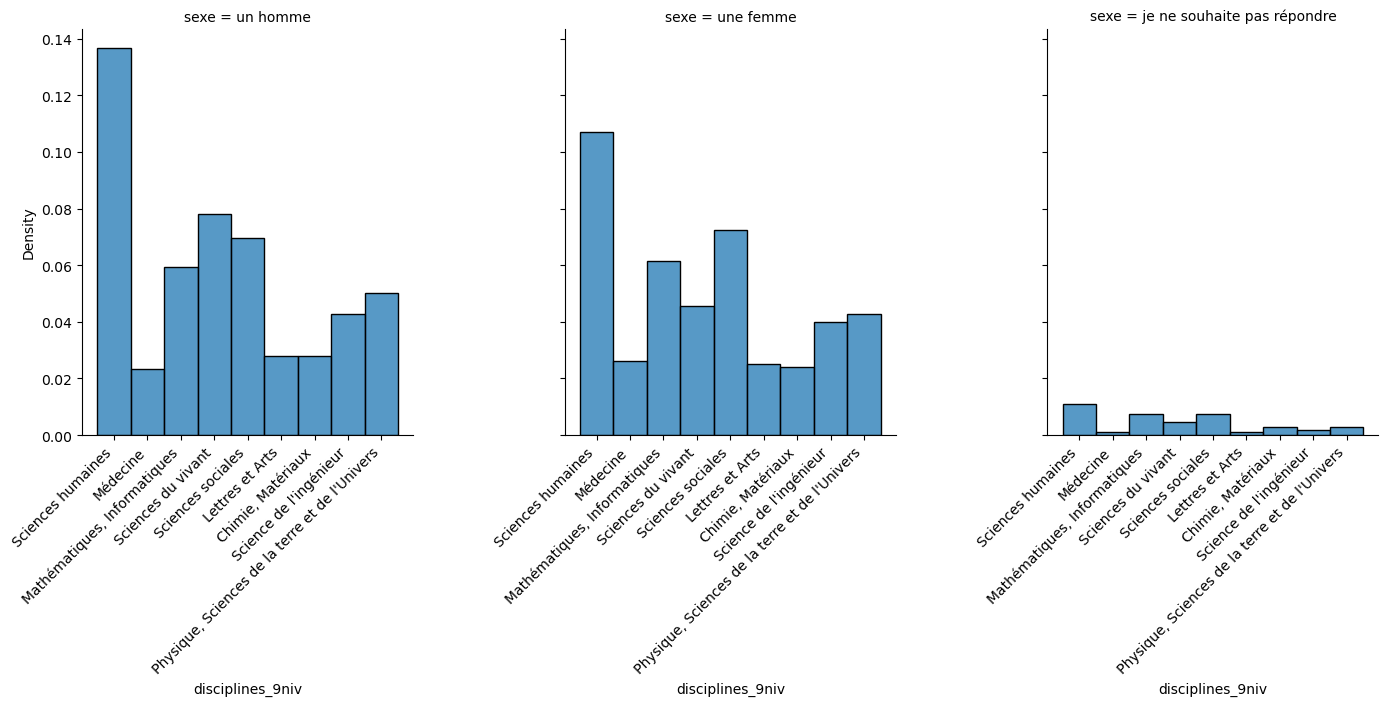

In [59]:
sns.displot(data=data, x="disciplines_9niv", col="sexe", multiple="dodge", stat="density").set_xticklabels(rotation=45, horizontalalignment="right")

La normalisation appliquée est globale à l'ensemble de la distribution. Il est également possible de normaliser séparément pour chaque sexe.

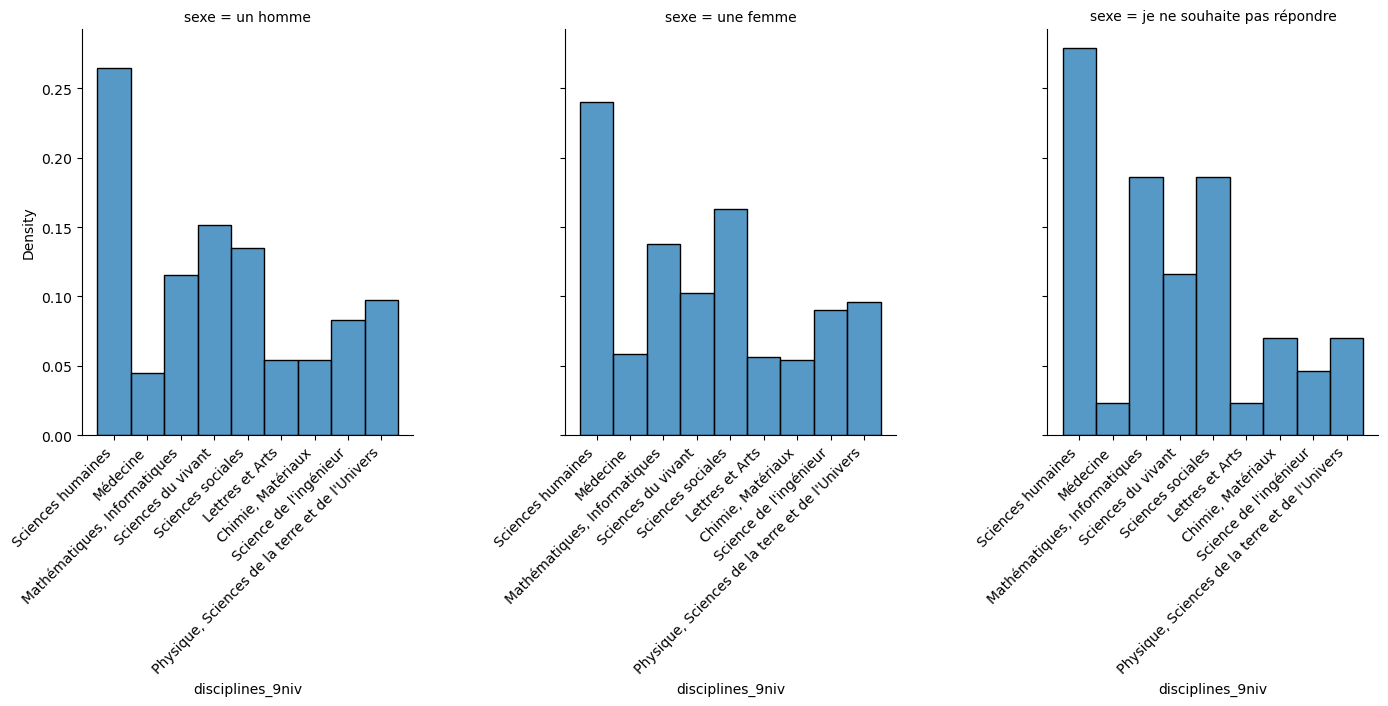

In [60]:
sns.displot(data=data, x="disciplines_9niv", col="sexe", multiple="dodge", stat="density", common_norm=False).set_xticklabels(rotation=45, horizontalalignment="right")

### 4.2. Graphes plus personnalisés avec Matplotlib

Retour au pie chart, un peu mis en forme

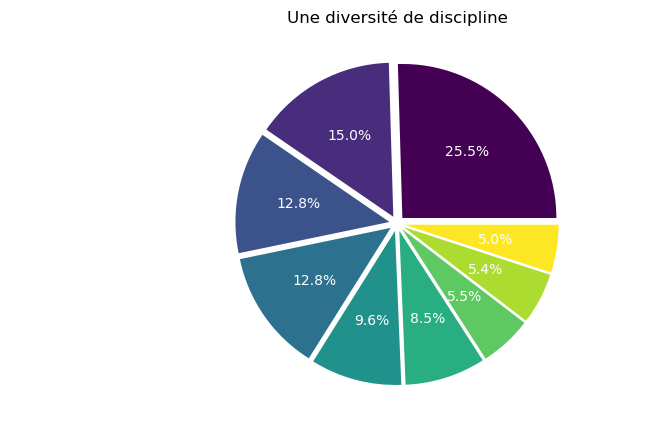

In [26]:
import matplotlib.pyplot as plt

# Définir l'écart entre les parts
exp = [0.05] * len(data["disciplines_9niv"].dropna().unique())

# Graphique avec options
data["disciplines_9niv"].value_counts().plot(kind="pie",
                                             cmap="viridis",
                                             figsize=(5,5),
                                             explode=exp, autopct='%1.1f%%', textprops={'color':"w"})
# Finaliser et sauvegarder
plt.ylabel("")
plt.title("Une diversité de discipline")
plt.savefig("Mon graphique.png",bbox_inches='tight')

### 4.3. Graphes dynamiques avec Plotly

La même en dynamique avec plotly : plus d'options de visualisation, etc.

In [27]:
import plotly.express as px

# Permettre l'affichage dans les slides
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [28]:

# Afficher et compléter
df = pd.DataFrame(data["disciplines_9niv"].value_counts().reset_index()) # Construction des données
df

,disciplines_9niv,count
0,Sciences humaines,274
1,Sciences sociales,161
2,"Mathématiques, Informatiques",138
3,Sciences du vivant,138
4,"Physique, Sciences de la terre et de l'Univers",103
5,Science de l'ingénieur,91
6,"Chimie, Matériaux",59
7,Lettres et Arts,58
8,Médecine,54


In [34]:
fig = px.pie(df, names="disciplines_9niv", values="count", title="Une diversité de disciplines")
fig.update_layout(font_family="Courier New", font_color="blue", title_font_family="Times New Roman",
                  title_font_color="orange", title_font_size=30)
fig.show()